# **Classifying Muffins and Cupcakes with SVM**

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import numpy as np
import pandas as pd

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

In [2]:
from sklearn.svm import SVC 

__Step 2:__ Import Data

In [3]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [4]:
# Each category count
recipes.Type.value_counts()

Muffin     10
Cupcake    10
Name: Type, dtype: int64

__Step 3:__ Prepare the Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


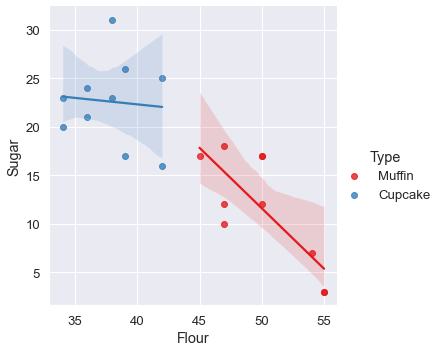

In [5]:
# Plot two ingredients using regression plot
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1');

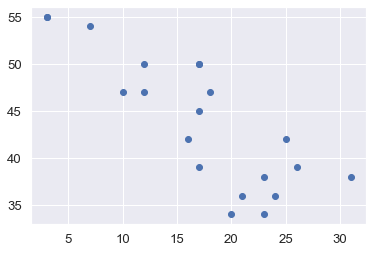

In [6]:
plt.scatter(recipes.Sugar,recipes.Flour)

In [7]:
# Specify inputs for the model
# Assignnmet: ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
#input: X
ingredients = recipes[['Flour','Sugar']]
ingredients[:3]

,Flour,Sugar
0,55,3
1,47,12
2,47,18


In [8]:
recipes.Type[:2]

0    Muffin
1    Muffin
Name: Type, dtype: object

In [ ]:
# In Type column we have categorical data, it is needed to be convrted into Numeric
#output y ==> convert muffin as 0 and Cupcake as 1
#np.where(recipes['Type']=='Muffin', 0, 1)

In [ ]:
#recipes.Type.map({'Muffin':0,'Cupcake':1})

In [9]:
# sklearn contains LabelEncoder to convert categorical data into numeric
from sklearn.preprocessing import LabelEncoder

In [10]:
#create an object of LabelEncoder
lb = LabelEncoder()

In [11]:
lb

LabelEncoder()

In [12]:
#fit n transform
type_label = lb.fit_transform(recipes.Type)

In [15]:
type_label[3:]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
lb.classes_

array(['Cupcake', 'Muffin'], dtype=object)

In [16]:
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [17]:
recipes.Type =type_label

In [18]:
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0
2,1,47,23,18,6,4,1,0,0
3,1,45,11,17,17,8,1,0,0
4,1,50,25,12,6,5,2,1,0
5,1,55,27,3,7,5,2,1,0
6,1,54,27,7,5,5,2,0,0
7,1,47,26,10,10,4,1,0,0
8,1,50,17,17,8,6,1,0,0
9,1,50,17,17,11,4,1,0,0


In [ ]:
plt.scatter(recipes.Sugar,recipes.Type)

__Step 4:__ Fit the Model

In [ ]:
#from sklearn.svm import SVC

In [22]:
type_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Fit the SVM model: Training phase
model = SVC() #default kernel='rbf'
model.fit(ingredients, type_label)

SVC()

In [20]:
#check data accuracy
model.score(ingredients, type_label)*100

95.0

In [21]:
# model is with rbf kernel
model.predict([[45,15]]) # 1means muffins

array([1])

In [23]:
model.predict([[100,100]])

array([1])

In [25]:
# flour Sugar
model.predict([[120,35]])

array([1])

In [26]:
model.predict([[10,480]])

array([1])

In [28]:
ingredients.describe()

,Flour,Sugar
count,20.000000,20.000000
mean,43.900000,17.100000
std,7.018022,7.538672
min,34.000000,3.000000
25%,38.000000,12.000000
50%,43.500000,17.000000
75%,50.000000,23.000000
max,55.000000,31.000000


In [29]:
# Fit the SVM model
# kernel = 'rbf' default
model2 = SVC(kernel='linear')
model2.fit(ingredients, type_label)
#check data accuracy
model2.score(ingredients, type_label)*100

100.0

In [34]:
recipes.tail(3)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
17,0,38,15,31,8,6,1,1,0
18,0,36,16,24,12,9,1,1,0
19,0,34,17,23,11,13,0,1,0


__Step 5:__ Visualize Results

In [35]:
model2.predict([[34,23]])

array([0])

In [37]:
model2.predict([[120,35]])

array([1])

In [ ]:
model2.predict(data)

In [38]:
data = ingredients[:2]
data

,Flour,Sugar
0,55,3
1,47,12


In [39]:
# m: slop 
m = model2.coef_
m

array([[ 6.66537262e-01, -4.85266891e-05]])

In [40]:
m1 = m[0,0]
m2 = m[0,1]
display(m1,m2)

0.666537262162451

-4.852668907809332e-05

In [41]:
c = model2.intercept_
c

array([-28.99349742])

In [42]:
model2.predict([[,3]])

array([1])

In [45]:
#y = m1x1+m2x2+c
from math import e
x1 = 34
x2 = 23

y = (m1*x1)+(m2*x2)+c
y

array([-6.33234662])

In [46]:
1/(1+e**(-(y)))

array([0.0017747])

In [47]:
model2.predict([[34,23]])

array([0])

In [ ]:
(m1*38)+(m2*31)+c

In [ ]:
model2.predict([[100,31]])

In [ ]:
1/(1+e**(-((m1*100)+(m2*31)+c)))

# Testing

In [ ]:
recipes.Type[:2]

In [ ]:
#flour and sugar data
model2.predict([[200,10]])

In [ ]:
#check support vectors
sv = model2.support_vectors_
sv[:,:]

In [ ]:
plt.plot(sv[:,0],sv[:,1],'ro')

In [ ]:
# Get the separating hyperplane
w = model2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model2.intercept_[0]) / w[1] #main hyperplane

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model2.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model2.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [ ]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [ ]:
model2.support_vectors_[:,:]

In [ ]:
#support vector plots
plt.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1],
            s=80, facecolors='black');

In [ ]:
# Look at the margins and support vectors
#data samples
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')#hyperplane
plt.plot(xx, yy_down, 'm--') #marginLine1
plt.plot(xx, yy_up, 'm--') #margineLine2
plt.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1],
            s=80, facecolors='black');

__Step 6:__ Predict New Case

In [ ]:
model2

In [ ]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model2.predict([[flour, sugar]]))==1:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [ ]:
# Predict if 20 parts flour and 200 parts sugar
muffin_or_cupcake(20,200)

In [ ]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

In [ ]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(20, 200, 'go', markersize='12') #test input

In [ ]:
plt.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1],
            s=80, facecolors='black');